### Dataset
For this demo, I will be using Tripadvisor Hotel Review datatset.

### Preliminaries

#### WordCloud Package - pip install wordcloud

In [2]:
from wordcloud import WordCloud, STOPWORDS

# For Data Manipulation
import pandas as pd

# For cleaning the texts
import re

# For the Mask
from PIL import Image
import numpy as np
import urllib
import requests

# For Visualization
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [3]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
print(f'The row and column sizes, respectively of the table are {df.shape}')
df.head()

The row and column sizes, respectively of the table are (20491, 2)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### Data Preprocessing
<p>To process best wordcloud we can produce, here are few things to do in the preprocessing stage:</p>
<ul>
    <li>combine all texts into one string</li>
    <li>turn all texts to lower case(the count of the different case letters are counted differently</li>
    <li>remove STOPWORDS</li>
</ul>

#### Preprocessing - Combining texts and Converting to Lower Case

In [4]:
text = df['Review'].str.cat(sep=', ').lower()

#### Preprocessing - Stop Words
<p>WordCloud comes with a decent list of stopwords such as "the","a","or" and much more. There are ways to eyeball potential words that may appear more frequently than desired and we can always add them to the list of stop words that our WordCloud would exclude. While one can split the text and a do value count, I choose to simply generate the WordCloud first and remove those that we do not want to be part of the image.</p>

In [5]:
# Adding the list of stopwords
stopwords = list(set(STOPWORDS)) + ["n't"]

### Visualization

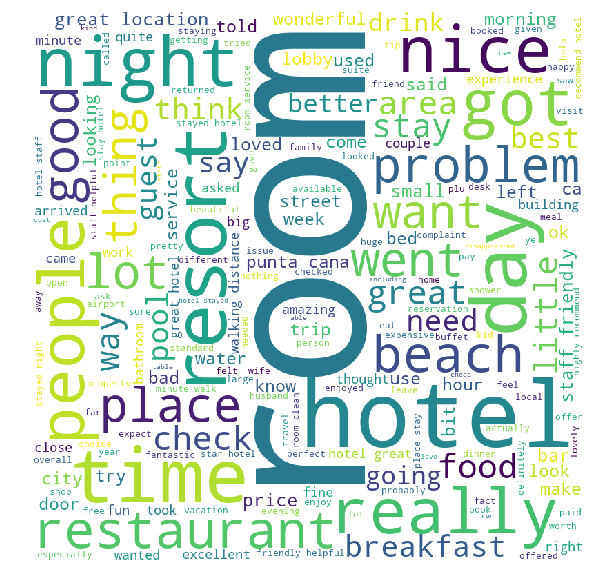

In [6]:
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     stopwords=stopwords,
                     min_font_size=10).generate(text)

# Plot the WordCloud Image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Masking
<p>We can improve the above wordcloud by adding some mask, which we can do so by choosing a PNG image. For the demo, lets choose the airplane icon as it is associated with hotels and the tourism industry.</p>
<p>In choosing a mask, remember to choose a png or jpeg image with white background. A colored background is treated as a separate object by the computer so it may not capture the shape that we want.</p>
<p>Now, in masking functions, the white portion of the image should be of value 255 and not 0.</p>

In [7]:
mask = np.array(Image.open(requests.get('https://www.freeiconspng.com/uploads/airplane-icon-image-gallery-1.png', stream=True).raw))

#### Eyeballing the mask objects:

In [21]:
mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

#### WordCloud With Mask

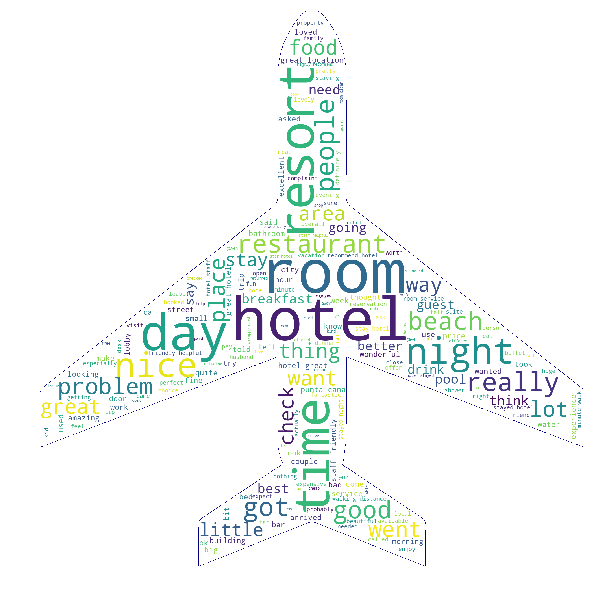

In [15]:
wordcloud = WordCloud(background_color ='white',
                mask=mask,   
                stopwords = stopwords,
                min_font_size = 10,
                width=mask.shape[1],
                height=mask.shape[0],
                contour_width=1, 
                contour_color='#000080').generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Color Functions for The WordCloud
<p>The color function parameter accepts a function and then ouputs a particular or variant of a color(scheme) for each word depending on its characteristics.</p>
<p>Many prefer the use of monotone color instead of the default color schemes for plotting software.</p>

In [16]:
def one_color_func(word=None, font_size=None, position=None,
                  orientation=None, font_path=None, 
                  random_state=None):
    h = 204 #0-360
    s = 100 #0-100
    l = random_state.randint(30, 70)#0-100 As we want to randomize it per color, let's randomize this
    
    return f"hsl({h},{s}%, {l}%)"

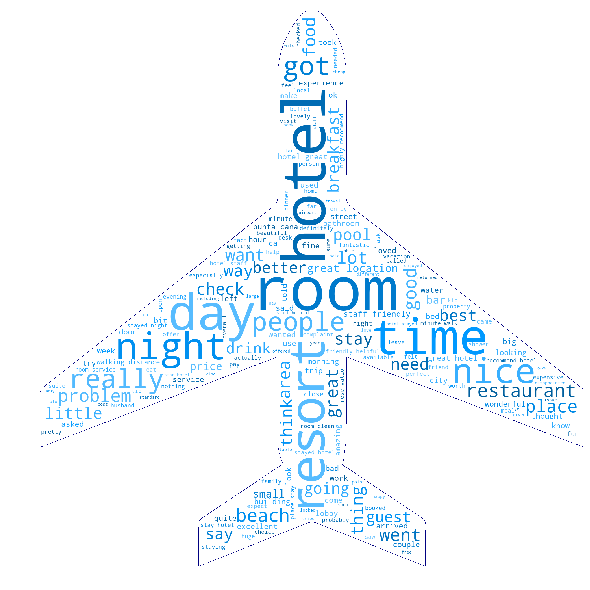

In [19]:
wordcloud = WordCloud(background_color ='white',
                mask=mask,   
                stopwords = stopwords,
                min_font_size = 10,
                width=mask.shape[1],
                height=mask.shape[0],
                color_func=one_color_func,
                contour_width=1, 
                contour_color='#000080').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()